# Is Monday Effect an Urban Myth?

**Authors**: Blythe King, Dinggyue Lie, Lucy (Yu) Xue\*, Sungbin Youk\
**Date**: June 6th, 2021\
**Description**: As a final project for PSTAT 234 in University of California, Santa Barbara, the authors examined the presence of Monday effect. The authors equally contributed to the project. The names of the authors are in an alphabetical order. The corresponding author is indicated with *.
----

**Table of Contents**
1. [Introduction](#introduction)\
    A. [Predicting the Stock Market](#predicting-the-stock-market)\
    B. [What is Monday Effect](#what-is-monday-effect)\
    C. [Our Objectives](#our-objectives)
2. [Tackling Objective 1](#tackling-objective-1)\
    A. [S&P 500 for 2017](#1_2017)\
    B. [S&P 500 for 2021](#1_2021)
3. [Tackling Objective 2](#tackling-objective-2)

## Introduction<a clas ="anchor" id = "introduction"></a>

### Predicting the Stock Market <a clas ="anchor" id = "predicting-the-stock-market"></a>

It will be great if you can predict the changes in the stock market. It will make you rich. Isn't that everyone's dream? Unfortunately, [efficient market hypothesis](https://www.investopedia.com/terms/e/efficientmarkethypothesis.asp) postulates that generating a stable parameter that reflects the share prices is impossible as the share prices reflect all information. 

It would be against the efficient market hypothesis if there is a predictable *pattern* in the stock market. In 1973, [Frank Cross](https://www.jstor.org/stable/pdf/4529641.pdf?refreqid=excelsior%3Adeff8e6e9e2c4c0b275b4b03a21b9c13) documented a non-random movement in stock prices. Here are the main findings from examining the Standard & Poor's Composite Stock Index from 1953 to 1970:
- The index have risen on Friday more often than on any other days of the week, and have risen least often on Monday. 
- When the Friday index declined, the Monday index was more likely to also see a decline. When the Friday index advanced, the Monday index was likely to remain static (neither advancing nor declining). 

### What is Monday Effect? <a clas ="anchor" id = "what-is-monday-effect"></a>

Over the years, Frank Cross's findings were coined into what is now known as the **Monday Effect**. There are two different definitions of the monday effect (each corresponding to the two findings that are mentioned above). 

- Monday effect states that the returns on Monday are less than the other days of the week, and are often negative on average ([Pettengill, 2003](https://www.jstor.org/stable/pdf/23292837.pdf?refreqid=excelsior%3A6da162ff7d91746d901fc154171e6015)).
- Monday effect states that the returns on the stock market on Monday, especially the first few hours, will follow the pattern of the previous Friday, espeically the last few hours ([Investopedia](https://www.investopedia.com/terms/m/mondayeffect.asp)). 

You may wonder what may be the reason behind this abnormality in the stock prices. As the existence of Monday effect is controversial (thus, the reason for our project), there isn't a clear answer. Some state that the stock returns are low on Monday because companies may hold on to bad news until the last day of stock trading (Friday), which in turn makes the next stock trading day (Monday) to take the hit. 

### Our Objectives <a clas ="anchor" id = "our-objectives"></a>

The objective of our project is in three-folds:
1) The first objective is to examine the first definitoin of Monday effect (i.e. the stock returns of Monday is less than the other days of the week). We will benchmark [Arman and Lestari's study](https://www.atlantis-press.com/proceedings/icame-18/125917114). They examined Monday effect in the Indonesian Stock Exchange. We will examine if Monday effect is also present in the U.S. stock market.
2) The second objective of this study is to examine the second definition of Monday effect. We will examine if Monday's returns are correlated to that of Friday.
3) We will take a step further and apply time series analysis to see "abnormailities" is stock returns.

----
## Tackling Objective 1 <a clas ="anchor" id = "tackling-objective-1"></a>

In our analysis, the stock return data are obtained from yfinance package in python. We will create two sets of data. The first data will include the stock returns of S&P 500 from 2014 to 2017. This data set has the identical timeframe to that of Arman and Lestari's study. The second dataset includes the latest S&P 500 constituents. 

### A Short Summary of Arman and Lestari's Study

Arman and Lestari examined the Monday effect by examining the banking sectors on the Indonesian stock market from 2014 to 2017. A one-sample t-test was conducted for each of the weekdays with the test value of 0. Therefore, they examined if the average stock returns (i.e., stock price of that day minus that of the previous day) for a specific day of the week is significantly different from 0. The results indicated that the average stock return on Monday is -0.0006, which was not statistically significant. In addition, they also examined another calendar effect by looking at monthly stock returns. They found Aprial and June to have significantly negative stock returns. Although the statistics were significant for these months, the effect size is small to have significant practical effect. 

### Importing Libraries and Packages

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import requests
import datetime
from datetime import date
import calendar
import io
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Importing the list of ticker for S&P 500 between 2014 to 2017  <a clas ="anchor" id = "1_2017"></a>

The first step is to retrieve the companies that constituted S&P 500 in the past. 

In [3]:
# Downloading the csv file from a Github page which has a list of companies and when they were added or removed from S&P 500
url = "https://raw.githubusercontent.com/leosmigel/analyzingalpha/master/sp500-historical-components-and-changes/sp500_history.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

#Turning the date column into a datetime object
df["date"] = pd.to_datetime(df["date"])

# Printing out the first 5 rows of the dataframe
df.head()

,Unnamed: 0,cik,date,name,value,variable
0,183,72741.0,1957-01-01,Eversource Energy,ES,added_ticker
1,228,874766.0,1957-01-01,Hartford Financial Svc.Gp.,HIG,added_ticker
2,435,1113169.0,1957-01-01,T. Rowe Price Group,TROW,added_ticker
3,349,1111711.0,1957-01-01,NiSource Inc.,NI,added_ticker
4,185,1109357.0,1957-01-01,Exelon Corp.,EXC,added_ticker


In [4]:
# Function to retrieve the tickers in S&P 500 for a given timeframe
def past_SP_ticker(end_date):
    ticker_list = []
    global df
    for index,row in df.iterrows():
        if row['date'] > end_date:
            break
        else:
            if row['variable'] == "added_ticker":
                ticker_list.append(row['value'])
            elif row['value'] in ticker_list:
                ticker_list.remove(row['value'])
    return ticker_list

In [5]:
# Using the past_SP_ticker() function to retrieve the tickers of S&P 500 for 2017. 
end_date = '20171231'
date_time_obj = datetime.datetime.strptime(end_date,'%Y%m%d')
SP_ticker_2017 = past_SP_ticker(date_time_obj)

### Creating a dataframe of stock returns for the identified S&P 500 constituents of 2017
The next step is to obtain the daily stock returns of the selected companies. This requires several steps: obtain the stock data of the S&P 500 constituents of 2017, delete the missing values, calculate the log retruns, create a multilevel index (i.e., hierarchical index) with the days of the week

#### Obtaining the stock data of S&P 500 constituents of 2017

In [6]:
# Using the ticker to obtain stock prices from yfinance
rawdata = yf.download(SP_ticker_2017, start="2013-12-31", end="2017-12-31")
rawdata.columns = rawdata.columns.set_names(['Value', 'Symbol'])
rawdata.head()

[*********************100%***********************]  488 of 488 completed

33 Failed downloads:
- SYMC: No data found, symbol may be delisted
- TIF: No data found, symbol may be delisted
- VIAB: No data found, symbol may be delisted
- FOX: Data doesn't exist for startDate = 1388476800, endDate = 1514707200
- Q: No data found for this date range, symbol may be delisted
- BBT: No data found, symbol may be delisted
- TYC: No data found for this date range, symbol may be delisted
- STI: No data found, symbol may be delisted
- ARNC: Data doesn't exist for startDate = 1388476800, endDate = 1514707200
- ETFC: No data found, symbol may be delisted
- HCP: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- LUK: No data found for this date range, symbol may be delisted
- CXO: No data found, symbol may be delisted
- RTN: No data found, symbol may be delisted
- KORS: No data found for this date range, symbol may be delisted
- WCG: No data found, symbol may be deli

Value       Adj Close                                                          \
Symbol              A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2013-12-31  38.247646  23.804220  108.574318  17.819056  38.783775  62.277599   
2014-01-02  37.592243  23.907927  107.652184  17.568449  38.174229  61.905617   
2014-01-03  38.067078  25.020357  110.732445  17.182545  38.409229  61.949898   
2014-01-06  37.879810  25.482304  109.672997  17.276247  37.006523  61.728436   
2014-01-07  38.421539  25.369177  111.026726  17.152695  37.079971  62.401627   

Value                                                   ...   Volume           \
Symbol            ABT        ACN       ADBE        ADI  ...      XEL     XLNX   
Date                                                    ...                     
2013-12-31  33.028294  70.729378  59.880001  42.778137  ...  1752800  1215400   
2014-01-02  32.942123  69.791710  59.290001  41.392246  ...  3192300  3436800   
2014-01-03  33.295418  70.023994  59.160000  41.669426  ...  2939400  1982700   
2014-01-06  33.734875  69.284195  58.119999  41.434235  ...  3382300  1970800   
2014-01-07  33.476364  70.127213  58.970001  41.652618  ...  3481500  1581200   

Value                                                                      \
Symbol           XOM     XRAY      XRX     XYL      YUM      ZBH     ZION   
Date                                                                        
2013-12-31   8509600   434400  2033475  558000  2966864   650000  1077400   
2014-01-02  11028100  1025400  3977691  765100  2721213   868800  1356700   
2014-01-03   9295600   623300  2763747  454500  2026826  1288200  1122500   
2014-01-06  11848500   986700  5657131  849400  4083698  1414900  1988200   
2014-01-07  11187000  2218300  5837583  611100  5035003  1852600  1343200   

Value                
Symbol          ZTS  
Date                 
2013-12-31  2270400  
2014-01-02  2576100  
2014-01-03  2524900  
2014-01-06  2763200  
2014-01-07  2338200  

[5 rows x 2928 columns]

#### Deleting the missing values

In [7]:
# Inspecting the missing values in terms of rows
rawdata['Close'].isna().sum(axis=0).describe()

count     488.000000
mean       79.977459
std       262.763277
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1008.000000
dtype: float64

In [8]:
# Making an list of tuples for tickers that has more than 3 missing values
high_missing_ticker = rawdata['Close'].isna().sum(axis=0) > 3
high_missing_ticker_list = high_missing_ticker[high_missing_ticker].index.tolist()
high_missing_ticker_tuples = list()
for i in ['Adj Close', 'Open', 'Close', 'High' ,'Low', 'Volume']:
    high_missing_ticker_tuples += list(zip([i]*len(high_missing_ticker_list),high_missing_ticker_list))

In [9]:
# Excluding columns (i.e., tickers) that has more than 3 missing values 
rawdata = rawdata.drop(high_missing_ticker_tuples, axis = 1)

In [10]:
# Finding out the dates that all tickers (columns) have missing values
missingdate =rawdata.isna().sum(axis=1) > 0
missingdate[missingdate].index

DatetimeIndex(['2015-09-22', '2017-09-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [11]:
# delete the first row if it has missing values
if rawdata.iloc[0].isna().sum().any():
    rawdata = rawdata.iloc[1:]

In [12]:
# other rows with missing values are replaced with the values from the previous date
rawdata = rawdata.fillna(method= 'ffill')

In [13]:
# Double check to see if all the missing values were either removed or replaced
(rawdata.isna().sum(axis=None)>0).any()

False

#### Calculating the log returns for closing price

In [14]:
# Getting the log returns from stock prices
logret = np.log(rawdata['Close']).diff()
logret.columns = pd.MultiIndex.from_product([['logreturn'], logret.columns])
# Joining logret and rawdata 
rawdata = rawdata.join(logret)
# row with the index of 2013-12-31 will be deleted as it is out of the scope of our data (2014~2017)
rawdata = rawdata.drop(pd.Timestamp('2013-12-31'))

In [15]:
print("After preprocessing the data, we have idenified the log returns of {} companies, which were included in S&P500 in 2017. To recap, we are examining the stock returns from 2014 to 2017. Therefore, we will be examining the stock returns of {} days".format(len(logret.columns), len(logret)))

After preprocessing the data, we have idenified the log returns of 440 companies, which were included in S&P500 in 2017. To recap, we are examining the stock returns from 2014 to 2017. Therefore, we will be examining the stock returns of 1008 days


#### Creating a new columns for the industry information

In [16]:
# Obtaining the information about the tickers that are included in SP_ticker_2017
industry_dic = dict()
for item in SP_ticker_2017:
    try:
        industry_dic[item] = yf.Ticker(item).info['industry']
    except:
        industry_dic[item] = None

In [17]:
# Adding the industry to a level of the column
rawdata.columns = pd.MultiIndex.from_tuples([(value, industry_dic[ticker], ticker) for value, ticker in rawdata.columns])
rawdata.head()

Adj Close                              \
           Diagnostics & Research   Airlines Specialty Retail   
                                A        AAL              AAP   
Date                                                            
2014-01-02              37.592243  23.907927       107.652184   
2014-01-03              38.067078  25.020357       110.732445   
2014-01-06              37.879810  25.482304       109.672997   
2014-01-07              38.421539  25.369177       111.026726   
2014-01-08              39.050190  26.047951       110.163490   

                                                            \
           Consumer Electronics Drug Manufacturers—General   
                           AAPL                       ABBV   
Date                                                         
2014-01-02            17.568449                  38.174229   
2014-01-03            17.182545                  38.409229   
2014-01-06            17.276247                  37.006523   
2014-01-07            17.152695                  37.079971   
2014-01-08            17.261322                  36.984486   

                                                 \
           Medical Distribution Medical Devices   
                            ABC             ABT   
Date                                              
2014-01-02            61.905617       32.942123   
2014-01-03            61.949898       33.295418   
2014-01-06            61.728436       33.734875   
2014-01-07            62.401627       33.476364   
2014-01-08            63.012794       33.777969   

                                                                    \
           Information Technology Services Software—Infrastructure   
                                       ACN                    ADBE   
Date                                                                 
2014-01-02                       69.791710               59.290001   
2014-01-03                       70.023994               59.160000   
2014-01-06                       69.284195               58.119999   
2014-01-07                       70.127213               58.970001   
2014-01-08                       70.669174               58.900002   

                           ...                    logreturn                 \
           Semiconductors  ... Utilities—Regulated Electric Semiconductors   
                      ADI  ...                          XEL           XLNX   
Date                       ...                                               
2014-01-02      41.392246  ...                    -0.015510       0.001088   
2014-01-03      41.669426  ...                    -0.000364      -0.007643   
2014-01-06      41.434235  ...                    -0.005469      -0.004394   
2014-01-07      41.652618  ...                     0.017039       0.002199   
2014-01-08      41.753410  ...                    -0.003962       0.008531   

                                                                \
           Oil & Gas Integrated Medical Instruments & Supplies   
                            XOM                           XRAY   
Date                                                             
2014-01-02            -0.014432                      -0.010784   
2014-01-03            -0.002409                       0.004784   
2014-01-06             0.001506                      -0.006036   
2014-01-07             0.014049                       0.015331   
2014-01-08            -0.003270                       0.001849   

                                                                           \
           Information Technology Services Specialty Industrial Machinery   
                                       XRX                            XYL   
Date                                                                        
2014-01-02                       -0.021596                      -0.012798   
2014-01-03                        0.006695                       0.009034   
2014-01-06                  

#### Creating a new columns for days of the week

In [18]:
# The day of the week is added as a new index (creating a hierarchical index)
rawdata['days'] = [calendar.day_name[day.weekday()] for day in rawdata.index]

#### Exporting dataframe as csv

In [19]:
rawdata.to_csv('SP500_2014_2017_multilevel.csv')

#### Staking the Closing and Log returns into one dataframe

For convenience in running some of the statistical analyses, the multilevel data of stock values are stacked into a dataframe. 

In [20]:
# To easily stack the data, it is easier to delete the days and industry information.
rawdata = rawdata.drop('days', axis =1)
rawdata.columns = rawdata.columns.droplevel(1)

In [21]:
# The data is stacked 
stacked_rawdata = rawdata.stack()
stacked_rawdata.reset_index(inplace=True)
stacked_rawdata = stacked_rawdata.rename(columns = {'level_1':'Ticker'})

# Days are added as a new column
stacked_rawdata['days'] = [calendar.day_name[day.weekday()] for day in stacked_rawdata['Date']]

# Industry information is added as a new column
stacked_rawdata['Industry'] = [industry_dic[ticker] for ticker in stacked_rawdata['Ticker']]
stacked_rawdata.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,logreturn,days,Industry
0,2014-01-02,A,37.592243,40.207439,40.844063,40.164520,40.844063,2678848.0,-0.017284,Thursday,Diagnostics & Research
1,2014-01-02,AAL,23.907927,25.360001,25.820000,25.059999,25.070000,8997900.0,0.004347,Thursday,Airlines
2,2014-01-02,AAP,107.652184,109.739998,111.879997,109.290001,110.360001,542700.0,-0.008529,Thursday,Specialty Retail
3,2014-01-02,AAPL,17.568449,19.754642,19.893929,19.715000,19.845715,234684800.0,-0.014164,Thursday,Consumer Electronics
4,2014-01-02,ABBV,38.174229,51.980000,52.330002,51.520000,52.119999,4569100.0,-0.015842,Thursday,Drug Manufacturers—General


#### Exporting dataframe as csv

In [22]:
stacked_rawdata.to_csv('SP500_2014_2017_stacked.csv')

### Analysis of Monday Effect

Now that we have successfully obtained the stock returns of S&P 500 constituents from 2014 to 2017, we can begin with our analysis. We will examine the patterns in stock returns across companies and industries to get a general picture. 

Since we have exported our data to .csv files, we will import the .csv rather than using `rawdata` variable. For those of you who are more interested in the analysis, rather than the data collection process, you can start the notebook from here.

In [13]:
# We will the log returns of the constituents and dropping the industry level
multilevel = pd.read_csv('SP500_2014_2017_multilevel.csv', header=[0,1,2], index_col=0)
logret = multilevel['logreturn'].droplevel(0, axis =1)
logret.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,-0.017284,0.004347,-0.008529,-0.014164,-0.015842,-0.005991,-0.002612,-0.013346,-0.009902,-0.032934,...,-0.015510,0.001088,-0.014432,-0.010784,-0.021596,-0.012798,-0.006901,-0.010247,-0.010401,-0.010146
2014-01-03,0.012552,0.045480,0.028211,-0.022211,0.006137,0.000715,0.010667,0.003323,-0.002195,0.006674,...,-0.000364,-0.007643,-0.002409,0.004784,0.006695,0.009034,0.006240,0.004327,0.007058,-0.009626
2014-01-06,-0.004931,0.018294,-0.009614,0.005438,-0.037204,-0.003581,0.013112,-0.010621,-0.017736,-0.005660,...,-0.005469,-0.004394,0.001506,-0.006036,0.008306,-0.001742,-0.000794,0.006456,-0.007058,-0.002186
2014-01-07,0.014200,-0.004449,0.012268,-0.007177,0.001983,0.010846,-0.007692,0.012094,0.014519,0.005257,...,0.017039,0.002199,0.014049,0.015331,0.008237,0.002902,0.013942,0.019752,0.003031,0.003745
2014-01-08,0.016230,0.026404,-0.007806,0.006313,-0.002578,0.009747,0.008969,0.007699,-0.001188,0.002417,...,-0.003962,0.008531,-0.003270,0.001849,-0.009065,-0.000580,-0.000392,0.024205,0.008704,-0.011278


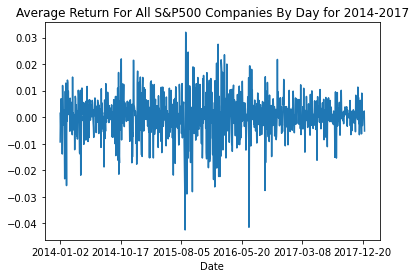

In [4]:
# Let's plotthe average returms
np.mean(logret, axis = 1).plot()
plt.title("Average Return For All S&P500 Companies By Day for 2014-2017")
plt.show()

In [15]:
# As we have imported the data again, we have to specify that our index is in datetime
logret.index = pd.to_datetime(logret.index)
# Let's retrieve the day of the week as the index and drop other columns that are not log returns
logret['Day of Week'] = logret.index.dayofweek
groupeddata = logret.groupby('Day of Week')
mean_per_stock = groupeddata.mean()
mean_per_stock.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,-0.000728,-0.000018,-0.000295,0.002913,-0.000918,0.000392,-0.000081,0.000699,-0.000951,0.000875,...,0.000995,0.000945,-0.000242,-0.000991,-0.002276,-0.000489,-0.000372,-0.000683,-0.000763,-0.000907
1,0.000380,0.002416,-0.000299,0.000178,0.000190,0.001269,-0.000398,0.001155,0.001225,0.001676,...,0.000265,0.000828,0.000516,0.000973,0.000396,0.001177,0.001111,0.001135,0.000077,0.000608
2,0.002487,0.000540,-0.000321,0.001457,0.002305,0.002221,0.000684,0.000788,0.001616,0.002203,...,-0.000073,0.000580,0.000173,0.001152,0.001555,0.001078,-0.000137,0.000683,0.001687,0.001819
3,-0.000146,0.000545,0.000040,-0.000772,0.000788,-0.001855,0.001494,0.000610,0.001566,-0.001591,...,0.001483,-0.000443,-0.000195,0.000176,-0.000450,0.000872,-0.000290,-0.000343,0.000878,0.001467
4,0.000315,0.000016,0.000356,0.000082,0.000492,-0.000771,0.000248,-0.000182,0.001717,-0.000438,...,0.000079,0.000021,-0.001235,0.000076,0.000091,0.000626,0.001660,0.000395,0.000631,0.000790


#### Descriptive Analaysis

Let's start with the basic descriptive statistics. Here are the mean log returns across all the stocks returns for each days of the week.\
0 indicates Monday, 2 Tuesday, 3 Wednesday, 4 Thursday, 5 Friday

In [16]:
np.mean(mean_per_stock, axis = 1)

Day of Week
0   -0.000102
1    0.000388
2    0.000969
3    0.000232
4    0.000301
dtype: float64

When we just look at the mean, it seems as if the average stock returns from 2014 to 2017 across companies is lowest on Monday. Let's visualize this.

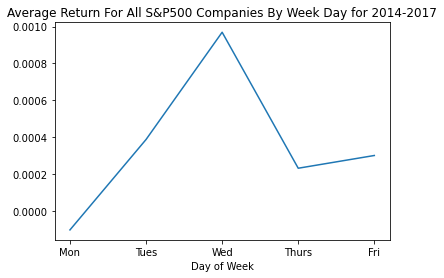

In [17]:
# Let's plot them to clearly see the difference
np.mean(mean_per_stock, axis = 1).plot()
plt.title("Average Return For All S&P500 Companies By Week Day for 2014-2017")
plt.xticks([0, 1, 2, 3, 4], ["Mon", "Tues", "Wed", "Thurs", "Fri"], rotation='horizontal')
plt.show()

The visualization clearly shows that Monday has the lowest average returns. To see if the Monday average return is significantly lower than any other day, run an ANOVA test if mean returns of each day are significantly different.

#### ANOVA

In [20]:
# let's conduct a oneway ANOVA on the five days of the week
fval, pval = stats.f_oneway(np.array(mean_per_stock.iloc[0].array), np.array(mean_per_stock.iloc[1].array), np.array(mean_per_stock.iloc[2].array), np.array(mean_per_stock.iloc[3].array), np.array(mean_per_stock.iloc[4].array))
print("F = {}, p = {}".format(fval,pval))

F = 63.1277408830443, p = 1.4350620154920426e-50


According to this test (assuming a significance level $\alpha$ = .05), the means across days are significantly different across the board. Next, see which day(s) is/are significantly different than the rest:

In [23]:
# We will conduct pair-wise comparison
dfTukey = pd.DataFrame({'return': np.reshape(mean_per_stock.values, -1),
                   'day': np.repeat(mean_per_stock.index, repeats=len(mean_per_stock.iloc[1,:]))})

tukey = pairwise_tukeyhsd(endog=dfTukey["return"], groups = dfTukey["day"], alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0005  0.001  0.0003  0.0007   True
     0      2   0.0011  0.001  0.0009  0.0013   True
     0      3   0.0003  0.001  0.0001  0.0005   True
     0      4   0.0004  0.001  0.0002  0.0006   True
     1      2   0.0006  0.001  0.0004  0.0008   True
     1      3  -0.0002 0.1625 -0.0003     0.0  False
     1      4  -0.0001  0.695 -0.0003  0.0001  False
     2      3  -0.0007  0.001 -0.0009 -0.0005   True
     2      4  -0.0007  0.001 -0.0009 -0.0005   True
     3      4   0.0001 0.8396 -0.0001  0.0003  False
----------------------------------------------------


For every Monday pairing, the p-value is significant. Thus, we should reject the null hypothesis that the means of Monday and any other day are the same. However, the same claim can be made for every Wednesday pairing. However, Wednesday is likely significantly higher than any other day, as the average returns on Wednesday is the "peak" in the plot, whereas Monday, having the lowest average returns, are likely significantly lower than any other day.

### Analysis by Month
As done in Arman and Lestari's study, we will examine if there is seasonal abnormaly can be examined in the average stock returns for each month.

In [24]:
# Let's organize our data in terms of the months
logret['Month of Year'] = logret.index.month

groupeddata = logret.groupby('Month of Year')
mean_per_stock_month = groupeddata.mean()

# Let's get some overview of the average stock returns of each company looks for each month
mean_per_stock_month

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS,Day of Week
Month of Year,,,,,,,,,,,,,,,,,,,,,
1,-0.001207,0.000740,0.000197,-0.001074,-0.003146,-0.000360,-0.001719,-0.001352,-0.000045,-0.001404,...,-0.000913,-0.002800,-0.002037,-0.000822,-0.002076,-0.001271,0.001255,-0.005256,-0.002026,2.150000
2,0.001668,0.002188,0.000081,0.003332,0.000553,0.001315,0.003089,0.001730,0.003448,0.003126,...,0.002066,0.000706,0.002459,0.001366,0.002940,0.002749,0.000446,0.002493,0.000257,2.077922
3,0.000696,-0.000038,-0.000214,0.001763,0.000840,0.000372,0.000081,0.001299,0.000923,0.002602,...,0.000292,0.000275,-0.000370,0.001175,0.000401,0.000993,0.001391,0.000715,0.000144,1.954545
4,0.000346,-0.003554,-0.001911,-0.000613,0.002319,-0.001138,-0.001003,-0.000181,-0.000043,-0.002152,...,-0.001523,0.001541,-0.000606,-0.002618,0.001608,0.001331,0.000213,0.000728,0.001373,1.951220
5,0.003027,0.000578,0.000193,0.002799,0.001239,0.001021,0.001690,0.001537,0.002350,0.003233,...,0.002803,-0.000606,0.001483,0.000420,0.000724,0.002170,0.001937,0.000314,0.002866,2.083333
6,-0.001240,-0.000835,0.000401,-0.001301,0.001431,0.000252,0.000992,-0.000634,0.001123,-0.001782,...,-0.001462,0.000371,0.000120,-0.001115,0.001393,0.000852,0.000135,0.001235,0.000238,1.988506
7,0.001489,0.001573,-0.000105,0.001348,-0.000040,0.001371,0.002416,0.000956,0.000292,-0.000553,...,-0.001319,-0.001519,0.000792,0.002931,-0.000969,-0.001007,-0.000675,0.001139,0.001179,2.023810
8,-0.000522,-0.001423,-0.000977,0.001277,-0.000212,-0.002100,-0.001563,-0.000378,0.001101,0.000267,...,0.001511,-0.001298,-0.002139,-0.000380,0.001636,-0.000236,-0.000956,-0.000072,0.000019,1.965909
9,-0.000783,-0.000328,-0.000100,-0.000457,0.000676,-0.001158,-0.000981,0.001657,0.000323,0.000441,...,0.001043,0.000062,-0.000709,-0.000337,0.000040,-0.000549,-0.000695,0.000447,-0.000117,2.108434


#### Descriptive statistics

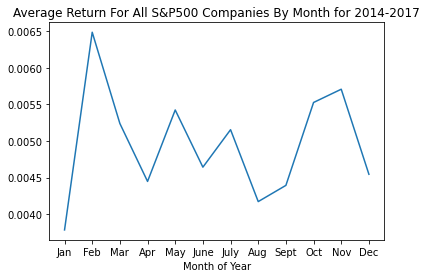

In [25]:
# Let's plot the average log returns of each of the company
np.mean(mean_per_stock_month, axis = 1).plot()
#plt.ylim([70, 90])
plt.title("Average Return For All S&P500 Companies By Month for 2014-2017")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"], rotation='horizontal')
plt.show()

The graph shows that the average stock return is lowest in January. We will conduct one-way ANOVA to examine whether the different sotck returns for each months of the year is statistically significant. 

#### ANOVA

In [114]:
# let's conduct a oneway ANOVA on the 12 months of a year
fval, pval = stats.f_oneway(np.array(mean_per_stock_month.iloc[0].array), np.array(mean_per_stock_month.iloc[1].array), np.array(mean_per_stock_month.iloc[2].array), np.array(mean_per_stock_month.iloc[3].array), np.array(mean_per_stock_month.iloc[4].array),np.array(mean_per_stock_month.iloc[5].array), np.array(mean_per_stock_month.iloc[6].array), np.array(mean_per_stock_month.iloc[7].array), np.array(mean_per_stock_month.iloc[8].array), np.array(mean_per_stock_month.iloc[9].array), np.array(mean_per_stock_month.iloc[10].array), np.array(mean_per_stock_month.iloc[11].array))
print("F = {}, p = {}".format(fval,pval))

F = 0.02757836303583597, p = 0.9999999040224181


With a significance level alpha = 0.05, we fail to reject the null and can currently claim that there is no difference in returns across months. Remember, we are still interested in Monday effect. Since we started to look at the data in terms of the month, we will take advantage of this. Next, we try subsetting the data by month and test Monday effect of each month.

### Examining Monday Effect for Each Month

In [27]:
# First, we will group the data by the month and then by days of the week. This creates a multilevel index
groupeddata = logret.groupby(['Month of Year', 'Day of Week'])
# Next, we will calculate the average stock returns for each of the company
mean_per_stock_months_and_days = groupeddata.mean()
mean_per_stock_months_and_days.head()

A       AAL       AAP      AAPL      ABBV  \
Month of Year Day of Week                                                     
1             0           -0.007968 -0.013658 -0.001970 -0.002447 -0.012029   
              1            0.001254  0.007250  0.004488 -0.003428 -0.003402   
              2            0.001265  0.002927 -0.004339 -0.000035 -0.005824   
              3           -0.002854  0.009473 -0.000579  0.001213  0.006157   
              4            0.000334 -0.006000  0.002354 -0.001019 -0.003386   

                                ABC       ABT       ACN      ADBE       ADI  \
Month of Year Day of Week                                                     
1             0           -0.004965 -0.003974 -0.008216 -0.009331 -0.004123   
              1            0.008901  0.001367  0.002174  0.001647 -0.000988   
              2           -0.001724 -0.005297 -0.000926 -0.002294 -0.000523   
              3           -0.004186 -0.002424 -0.001036  0.004249 -0.004567   
              4           -0.001213  0.000717 -0.000782  0.002489  0.002219   

                           ...       XEL      XLNX       XOM      XRAY  \
Month of Year Day of Week  ...                                           
1             0            ... -0.004467 -0.006837 -0.012033 -0.008416   
              1            ...  0.006382 -0.000030  0.002813  0.005703   
              2            ...  0.000984 -0.000002 -0.006931 -0.004264   
              3            ...  0.004473 -0.003512 -0.000082 -0.001584   
              4            ...  0.000487  0.003845 -0.000841 -0.003542   

                                XRX       XYL       YUM       ZBH      ZION  \
Month of Year Day of Week                                                     
1             0           -0.011114 -0.012360 -0.008580  0.001515 -0.016836   
              1            0.011240  0.001202  0.002789  0.010427 -0.003865   
              2           -0.002860  0.002347 -0.001714  0.001626 -0.002638   
              3            0.001149 -0.002866  0.000047 -0.006130 -0.002556   
              4           -0.005405 -0.001500 -0.001086 -0.000934 -0.003725   

                                ZTS  
Month of Year Day of Week            
1             0           -0.009625  
              1           -0.001417  
              2           -0.001793  
              3           -0.000202  
              4            0.000533  

[5 rows x 440 columns]

#### Descriptive Statistics
Instead of shwoing 60 different stock returns (12 months x 5 days), let's dive right into visualizing the data. 

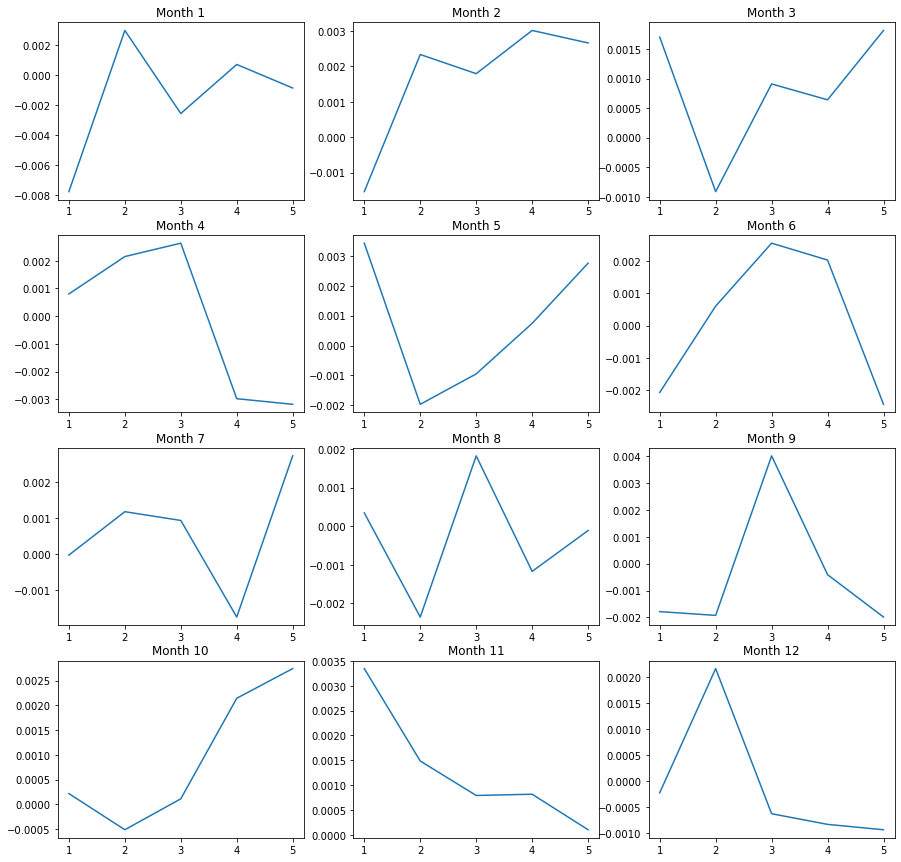

In [78]:
fig, ax = plt.subplots(4,3, figsize=(15,15))
plt.title("Average Returns by Day by Month")

## Write a for loop
for i in range(1,13):
    temp_mean_per_stock = mean_per_stock_months_and_days.iloc[mean_per_stock_months_and_days.index.get_level_values('Month of Year') == i]
    x = (i-1)//3
    y = (i-1)%3
    ax[x,y].plot(range(1,6), np.mean(temp_mean_per_stock, axis = 1).values)
    ax[x,y].set_title('Month %i' % (i))
plt.show()

For each month, there seems to be fluctuation in the stock returns across the week. Let's see if they are statistically significant, we will run oneway ANOVA for each month. 

#### ANOVA

In [115]:
pvals_months = []

for i in range(1,13):
        temp_mean_per_stock = mean_per_stock_months_and_days.iloc[mean_per_stock_months_and_days.index.get_level_values('Month of Year') == i]
        fval, pval = stats.f_oneway(np.array(temp_mean_per_stock.iloc[0].array), np.array(temp_mean_per_stock.iloc[1].array), np.array(temp_mean_per_stock.iloc[2].array), np.array(temp_mean_per_stock.iloc[3].array), np.array(temp_mean_per_stock.iloc[4].array))
        pvals_months.append(pval)
df_pval = pd.DataFrame(pvals_months, columns = ['p-value'])
df_pval.index += 1 
df_pval.index.name = 'Month'
df_pval

,p-value
Month,
1,6.003414e-253
2,1.116529e-77
3,2.609497e-55
4,6.117235e-175
5,3.601379e-151
6,9.528577e-191
7,7.261037e-93
8,2.939574e-95
9,4.124529e-226


With a significant level of $\alpha$ = .05, we can reject the null for each month. So, within each month, the average returns vary significantly across days. We will conduct a pairwise mean comparison with Tukey HSD correction to see which days of the week are significantly different from each other for all the twelve months

In [116]:
for i in range(1,13):
    print('Month %i' % (i))
    temp_mean_per_stock = mean_per_stock_months_and_days.iloc[mean_per_stock_months_and_days.index.get_level_values('Month of Year') == i]
    dfTukey = pd.DataFrame({'return': np.reshape(temp_mean_per_stock.values, -1),
                   'day': np.repeat([0,1,2,3,4], repeats=len(temp_mean_per_stock.iloc[1,:]))})
    tukey = pairwise_tukeyhsd(endog=dfTukey["return"], groups = dfTukey["day"], alpha = 0.05)
    print(tukey)

Month 1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   0.0107 0.001  0.0099  0.0115   True
     0      2   0.0052 0.001  0.0044   0.006   True
     0      3   0.0085 0.001  0.0077  0.0093   True
     0      4   0.0069 0.001  0.0061  0.0077   True
     1      2  -0.0055 0.001 -0.0063 -0.0047   True
     1      3  -0.0023 0.001 -0.0031 -0.0015   True
     1      4  -0.0038 0.001 -0.0046  -0.003   True
     2      3   0.0033 0.001  0.0025  0.0041   True
     2      4   0.0017 0.001  0.0009  0.0025   True
     3      4  -0.0016 0.001 -0.0024 -0.0008   True
---------------------------------------------------
Month 2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0039  0.001  0.0032 0.0046   True
     0      2   0.0033  0.001  0.0026  0.004   T

The months were Monday appears to be significantly different from other days at "higher rates" than other day-day pairings are February and November. Looking at the plots, Mondays in February have the lowest average returns, and Mondays in November have the highest average returns. Therefore, Monday returns do not behave the same across months, indicating that if there is a Monday effect, it is inconsistent across time. 

### Monday Effect by Industry
Arman and Lestari's study focused only on the Banking industry. We will take a step further and examine all of the industries. So, let's see if the Monday effect is consitently present across all industries. 

#### Importing Data

In [120]:
multilevel = pd.read_csv('SP500_2014_2017_multilevel.csv', header=[0,1,2], index_col=0)
# First of all, only want log returns:
multilevelLog = multilevel['logreturn']
multilevelLog.head()

,Diagnostics & Research,Airlines,Specialty Retail,Consumer Electronics,Drug Manufacturers—General,Medical Distribution,Medical Devices,Information Technology Services,Software—Infrastructure,Semiconductors,...,Utilities—Regulated Electric,Semiconductors,Oil & Gas Integrated,Medical Instruments & Supplies,Information Technology Services,Specialty Industrial Machinery,Restaurants,Medical Devices,Banks—Regional,Drug Manufacturers—Specialty & Generic
,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,-0.017284,0.004347,-0.008529,-0.014164,-0.015842,-0.005991,-0.002612,-0.013346,-0.009902,-0.032934,...,-0.015510,0.001088,-0.014432,-0.010784,-0.021596,-0.012798,-0.006901,-0.010247,-0.010401,-0.010146
2014-01-03,0.012552,0.045480,0.028211,-0.022211,0.006137,0.000715,0.010667,0.003323,-0.002195,0.006674,...,-0.000364,-0.007643,-0.002409,0.004784,0.006695,0.009034,0.006240,0.004327,0.007058,-0.009626
2014-01-06,-0.004931,0.018294,-0.009614,0.005438,-0.037204,-0.003581,0.013112,-0.010621,-0.017736,-0.005660,...,-0.005469,-0.004394,0.001506,-0.006036,0.008306,-0.001742,-0.000794,0.006456,-0.007058,-0.002186
2014-01-07,0.014200,-0.004449,0.012268,-0.007177,0.001983,0.010846,-0.007692,0.012094,0.014519,0.005257,...,0.017039,0.002199,0.014049,0.015331,0.008237,0.002902,0.013942,0.019752,0.003031,0.003745
2014-01-08,0.016230,0.026404,-0.007806,0.006313,-0.002578,0.009747,0.008969,0.007699,-0.001188,0.002417,...,-0.003962,0.008531,-0.003270,0.001849,-0.009065,-0.000580,-0.000392,0.024205,0.008704,-0.011278


In [121]:
# Let's create a list of unique industries.
industries = np.unique(multilevelLog.columns.get_level_values(0))[:-1] #-1 removes nan

In [122]:
# Let's create an array of datasets subestting multilvelLog by industry
dataByIndustry = []

for i in range(len(industries)):
    temp = multilevelLog.iloc[:, multilevelLog.columns.get_level_values(0) == industries[i]]
    temp.index = pd.to_datetime(temp.index)
    temp['day'] = temp.index.dayofweek.values
    dataByIndustry.append(temp)

<ipython-input-122-386565d91ae2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['day'] = temp.index.dayofweek.values


In [123]:
# For each industry, we will create a dataset with the means by day:
meanByDayIndustry = []

for i in range(len(industries)):
    groupedtemp = dataByIndustry[i].groupby('day')
    groupedmean = groupedtemp.mean()
    meanByDayIndustry.append(groupedmean)

#### ANOVA

In [125]:
# We will perform oneway ANOVA to see if the stock returns of days are significantly different in each industry
pvalues = []
sigIndustriesByDay = []
notSigIndustriesByDay = []
tukeyDay = []

for i in range(len(industries)):
    fval, pval = stats.f_oneway(np.array(meanByDayIndustry[i].iloc[0].array), np.array(meanByDayIndustry[i].iloc[1].array), np.array(meanByDayIndustry[i].iloc[2].array), np.array(meanByDayIndustry[i].iloc[3].array), np.array(meanByDayIndustry[i].iloc[4].array))
    if pval < 0.05: #if significant, perform TukeyHSD
        print(industries[i])
        sigIndustriesByDay.append(industries[i])
        dfTukey = pd.DataFrame({'return': np.reshape(meanByDayIndustry[i].values, -1),
                   'day': np.repeat(meanByDayIndustry[i].index, repeats=len(meanByDayIndustry[i].iloc[1,:]))})
        tukey = pairwise_tukeyhsd(endog=dfTukey["return"], groups = dfTukey["day"], alpha = 0.05)
        print(tukey)
        tukeyDay.append(tukey)
    else:
        notSigIndustriesByDay.append(industries[i])

Advertising Agencies
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0005 0.5238 -0.0019 0.0008  False
     0      2   0.0011 0.0947 -0.0002 0.0024  False
     0      3   0.0007 0.3808 -0.0007  0.002  False
     0      4   0.0003  0.889  -0.001 0.0016  False
     1      2   0.0017 0.0207  0.0003  0.003   True
     1      3   0.0012 0.0698 -0.0001 0.0025  False
     1      4   0.0008 0.2178 -0.0005 0.0022  False
     2      3  -0.0004 0.6683 -0.0018 0.0009  False
     2      4  -0.0008 0.2346 -0.0021 0.0005  False
     3      4  -0.0004 0.7777 -0.0017  0.001  False
---------------------------------------------------
Airlines
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0017 0.0074  0.0004 0.0031   True
     0      2   0.0013 0.0513    -

The only industries with Mondays being mostly significantly different at higher rates than the other days are REIT-Residential, REIT-Office, REIT-Industrial, REIT-Healthcare Facilities, Oil & Gas Midstream, and Oil & Gas E&P. Next, we will plot the average returns across those days in those industries to see if Monday has lower returns than the other days.

#### Visualization of Significant Industries

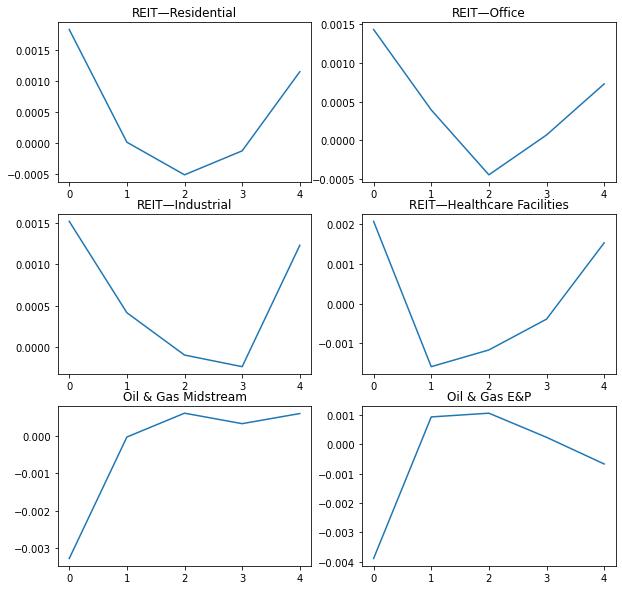

In [126]:
sigDifIndust = ["REIT—Residential", "REIT—Office", "REIT—Industrial", "REIT—Healthcare Facilities", "Oil & Gas Midstream", "Oil & Gas E&P"]

fig, ax = plt.subplots(len(sigDifIndust)//2, 2, figsize=(10,10))
plt.title("Average Returns by Day by Industry")

## Write a for loop
for i in range(len(sigDifIndust)):
    ind = np.argwhere(industries==sigDifIndust[i])[0][0]
    x = (i)//2
    y = (i) %2
    ax[x,y].plot(range(0, 5), np.mean(meanByDayIndustry[ind], axis = 1))
    ax[x,y].set_title(sigDifIndust[i])

For Oil & Gas E&P and Oil & Gas Midstream, the average returns on Monday are significantly lower, indicating a possible Monday effect in these industries. As these industires are very closely related, it is no suprised that the stock return patterns are similar for these two industries. When considering the industries as a whole, the stock reutnrs on Monday were the highest. Therefore, there isn't a consistent pattern across industries. 

In [127]:
# Let's look at the proportion of industries that showed Monday effect
len(sigDifIndust)/len(industries)

0.05172413793103448

Only around 5% of the industries had Monday stock returns to be significantly different from other days of the week. Given that we have chosen our type-I error rate to be .05, this number is not suprising. 

Well, when examined across months and industries, the overall average stock returns of S&P 500 constituents in 2017 were the lowest. However, when divided into months and industries, the pattern of stock returns varied. 

Before you put a pin on our findings, let's see if the results will be replicated for the S&P 500 constituents in 2021. 

### Creating a dataframe of stock returns for the latest S&P 500 constituents  <a clas ="anchor" id = "1_2021"></a>
The list of constituents for the latest S&P500 are available in `list of sp500.xlsx` file. 

In [ ]:
SP500list = pd.read_excel('list of sp500.xlsx', engine='openpyxl')
SP_ticker_2020 = SP500list['Symbol'].tolist()

#### Obtaining the stock data of latest S&P 500 constituents

In [ ]:
# Using the ticker to obtain stock prices from yfinance
rawdata = yf.download(SP_ticker_2020, start="2017-12-30", end="2021-05-28")
rawdata.columns = rawdata.columns.set_names(['Value', 'Symbol'])
rawdata.head()

#### Deleting the missing values

In [ ]:
# Inspecting the missing values in terms of rows
rawdata['Close'].isna().sum(axis=0).describe()

In [ ]:
# Making an list of tuples for tickers that has more than 3 missing values
high_missing_ticker = rawdata['Close'].isna().sum(axis=0) > 3
high_missing_ticker_list = high_missing_ticker[high_missing_ticker].index.tolist()
high_missing_ticker_tuples = list()
for i in ['Adj Close', 'Open', 'Close', 'High' ,'Low', 'Volume']:
    high_missing_ticker_tuples += list(zip([i]*len(high_missing_ticker_list),high_missing_ticker_list))

In [ ]:
# Excluding columns (i.e., tickers) that has more than 3 missing values 
rawdata = rawdata.drop(high_missing_ticker_tuples, axis = 1)

In [ ]:
# Finding out the dates that all tickers (columns) have missing values
missingdate =rawdata.isna().sum(axis=1) > 0
missingdate[missingdate].index

In [ ]:
# delete the first row if it has missing values
if rawdata.iloc[0].isna().sum().any():
    rawdata = rawdata.iloc[1:]

In [ ]:
# other rows with missing values are replaced with the values from the previous date
rawdata = rawdata.fillna(method= 'ffill')

In [ ]:
# Double check to see if all the missing values were either removed or replaced
(rawdata.isna().sum(axis=None)>0).any()

#### Calculating the log returns for closing price

In [ ]:
# Getting the log returns from stock prices
logret = np.log(rawdata['Close']).diff()
logret.columns = pd.MultiIndex.from_product([['logreturn'], logret.columns])
# Joining logret and rawdata 
rawdata = rawdata.join(logret)

In [ ]:
print("After preprocessing the data, we have idenified the log returns of {} companies, which were included in S&P500 in 2021. To recap, we are examining the stock returns from 2018 to May 2021. Therefore, we will be examining the stock returns of {} days".format(len(logret.columns), len(logret)))

#### Creating a new columns for the industry information

In [ ]:
# Obtaining the information about the tickers that are included in SP_ticker_2017
industry_dic = dict()
for item in SP_ticker_2020:
    try:
        industry_dic[item] = yf.Ticker(item).info['industry']
    except:
        industry_dic[item] = None

In [ ]:
# Adding the industry to a level of the column
rawdata.columns = pd.MultiIndex.from_tuples([(value, industry_dic[ticker], ticker) for value, ticker in rawdata.columns])
rawdata.head()

#### Creating a new columns for days of the week

In [ ]:
# The day of the week is added as a new index (creating a hierarchical index)
rawdata['days'] = [calendar.day_name[day.weekday()] for day in rawdata.index]

#### Exporting dataframe as csv

In [ ]:
rawdata.to_csv('SP500_2018_2021_multilevel.csv') 

#### Staking the Closing and Log returns into one dataframe

For convenience in running some of the statistical analyses, the multilevel data of stock values are stacked into a dataframe. 

In [ ]:
# To easily stack the data, it is easier to delete the days and industry information.
rawdata = rawdata.drop('days', axis =1)
rawdata.columns = rawdata.columns.droplevel(1)

In [ ]:
# The data is stacked 
stacked_rawdata = rawdata.stack()
stacked_rawdata.reset_index(inplace=True)
stacked_rawdata = stacked_rawdata.rename(columns = {'level_1':'Ticker'})

# Days are added as a new column
stacked_rawdata['days'] = [calendar.day_name[day.weekday()] for day in stacked_rawdata['Date']]

# Industry information is added as a new column
stacked_rawdata['Industry'] = [industry_dic[ticker] for ticker in stacked_rawdata['Ticker']]
stacked_rawdata.head()

# Before we forget, let's add the days and industry column back to our rawdata. We will comeback to this later
rawdata.columns = pd.MultiIndex.from_tuples([(value, industry_dic[ticker], ticker) for value, ticker in rawdata.columns])
rawdata['days'] = [calendar.day_name[day.weekday()] for day in rawdata.index]


#### Exporting dataframe as csv

In [ ]:
stacked_rawdata.to_csv('SP500_2018_2021_stacked.csv')

### Analyzing the Monday Effect
The next step is to analyze the Monday effect. First, as done in Arman and Lestari's research, one-sample t-test is conducted for each day of the week. The test value is 0. Therefore, a significant result indicates that it is highly unlikely to have obtained the average log stock returns on a specific day of the week given that the null hypothesis is true (i.e. the average log stock return is 0).

##### Descriptive Statistics

In [ ]:
# Let's examine how many columns we have
print('There are {} columns in our dataset'.format(len(rawdata.columns)))
# The days of the week is one of the columns
print('Is days one of the columns?','days' in rawdata.columns)

In [ ]:
# Before we move on, let's make a multilevel index for the rows.
rawdata.set_index('days', append=True, inplace=True)

In [ ]:
# Frequency count for each day
rawdata['logreturn'].groupby(level=1).count().mean(axis=1)

In [ ]:
# Before we get into conducting one sample t-test, 
# let's look at the mean of log stock returns for each day of the week
rawdata['logreturn'].groupby(level=1).mean().mean(axis=1).sort_values()

In [ ]:
# Let's look at the standard deviation of log stock returns for each day of the week
rawdata['logreturn'].groupby(level=1).std().std(axis=1).sort_values()

Although less tha Thursday, Monday has a negative log stock returns and a largest variance. Let's see if this value is statistically significant. 

----------

## Tackling Objective 2  <a clas ="anchor" id = "tackling-objective-2"></a>

In this section, we will examine Monday effect in term of its second defintion. We will use the same data that were used in the previous section. 

Disclaimer: did you know that you can run R codes in a python based jupyter notebook? Well, the environment that this notebook is built on allows for that with the use of [rpy2](https://pypi.org/project/rpy2/) package. We simply use `%%R` in the cell that we want to run R codes. `%%R` is called R magic (and yes, magic indeed). 

### Setting up R and Importing R libraries

In [1]:
#Let's import rpy2
import rpy2
#The following code enables you to use R magic
%load_ext rpy2.ipython

C:\Users\SungbinYouk-PC\miniconda3\envs\stockproject\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%R
#Let's load the R packages that we will use, we will use `pacman` library to help us load all other libraries 
install.packages("pacman")
library(pacman)
p_load(dplyr, plyr, readr, tidyr, reshape, ggplot2, sjPlot)

R[write to console]: Installing package into 'C:/Users/SungbinYouk-PC/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



--- Please select a CRAN mirror for use in this session ---


R[write to console]: trying URL 'https://repo.miserver.it.umich.edu/cran/bin/windows/contrib/4.0/pacman_0.5.1.zip'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 389623 bytes (380 KB)

R[write to console]: downloaded 380 KB




package 'pacman' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\SungbinYouk-PC\AppData\Local\Temp\RtmpqUHg86\downloaded_packages


### Importing the data for S&P 500 constituents in 2017

In [ ]:
%%R
#Let's read in the .csv file of the stock returns for S&P 500 constituents in 2017
SP500_2014_2017_stacked <- read_csv("SP500_2014_2017_stacked.csv")

#We will sort the dataset by company (i.e. tickers)
all_data <- SP500_2014_2017_stacked[order(SP500_2014_2017_stacked$Ticker),]

#The numeric date will be used as an index to pair log returns of two consecutive days
Date_num = as.numeric(all_data$Date)
all_data["Date_num"]=Date_num 

#Before we move on, let's clean the data by removing the date variable
all_data_no_date = subset(all_data, select = -Date)

# Let's generate a list of unique companies (i.e. unique tickers)
Ticker_list = unique(all_data_no_date$Ticker)

### Seperating the dataset based on the days of the week

In [ ]:
%%R
#We wil now make pairs of og-return for two consecutive days
Monday = Tuesday = Wednesday = Thursday = Friday = Next_Monday = {}

for (ticker in Ticker_list){
  Company_temp = {}
  Monday_temp = {}
  # Let's take one company at a time
  Company_temp = filter(all_data_no_date,Ticker == ticker)
  # We will use Monday as the benchmark for finding pairs
  Monday_temp = filter(Company_temp,days == "Monday")
  Monday = rbind(Monday, Monday_temp)
  
  for (date in Monday_temp$Date_num){
    #Friday is 4 days after Monday
    Friday_temp =  subset(Company_temp, Date_num == (date+4))
    #If there is no data for the following Friday, set as NA
    if(dim(Friday_temp)[1] == 0){Friday_temp = NA}
    Friday = rbind(Friday,Friday_temp)
    #We will repeat this for all other days of the week
    Thursday_temp = subset(Company_temp, Date_num == (date+3))
    if(dim(Thursday_temp)[1] == 0){Thursday_temp = NA}
    Thursday = rbind(Thursday,Thursday_temp)
    
    Wednesday_temp = subset(Company_temp, Date_num == (date+2))
    if(dim(Wednesday_temp)[1] == 0){Wednesday_temp = NA}
    Wednesday = rbind(Wednesday,Wednesday_temp)
    
    Tuesday_temp = subset(Company_temp, Date_num == (date+1))
    if(dim(Tuesday_temp)[1] == 0){Tuesday_temp = NA}
    Tuesday = rbind(Tuesday,Tuesday_temp)
    
    Next_Monday_temp = subset(Company_temp, Date_num == (date+7))
    if(dim(Next_Monday_temp)[1] == 0){Next_Monday_temp = NA}
    Next_Monday = rbind(Next_Monday,Next_Monday_temp)
  }
}

#Let's save the data sets for each days of the week to .csv files
write.csv(Monday,"Monday.csv", row.names = FALSE)
write.csv(Tuesday,"Tuesday.csv", row.names = FALSE)
write.csv(Wednesday,"Wednesday.csv", row.names = FALSE)
write.csv(Thursday,"Thursday.csv", row.names = FALSE)
write.csv(Friday,"Friday.csv", row.names = FALSE)
write.csv(Next_Monday,"Next_Monday.csv", row.names = FALSE)

### Reading in the datasets for each days of the week

In [3]:
%%R
#
Monday = read_csv("Monday.csv")
Tuesday = read_csv("Tuesday.csv")
Wednesday = read_csv("Wednesday.csv")
Thursday = read_csv("Thursday.csv")
Friday = read_csv("Friday.csv")
Next_Monday = read_csv("Next_Monday.csv")

Monday['Index']= 1:nrow(Monday)
Tuesday['Index']= 1:nrow(Tuesday)
Wednesday['Index']= 1:nrow(Wednesday)
Thursday['Index']= 1:nrow(Thursday)
Friday['Index']= 1:nrow(Friday)
Next_Monday['Index']= 1:nrow(Next_Monday)


-- Column specification -------------------------------------------------------------------------------------------------------------------------------------
cols(
  X1 = col_double(),
  Ticker = col_character(),
  `Adj Close` = col_double(),
  Close = col_double(),
  High = col_double(),
  Low = col_double(),
  Open = col_double(),
  Volume = col_double(),
  logreturn = col_double(),
  days = col_character(),
  Industry = col_character(),
  Date_num = col_double()
)


-- Column specification -------------------------------------------------------------------------------------------------------------------------------------
cols(
  X1 = col_double(),
  Ticker = col_character(),
  `Adj Close` = col_double(),
  Close = col_double(),
  High = col_double(),
  Low = col_double(),
  Open = col_double(),
  Volume = col_double(),
  logreturn = col_double(),
  days = col_character(),
  Industry = col_character(),
  Date_num = col_double()
)


-- Column specification ---------------------------

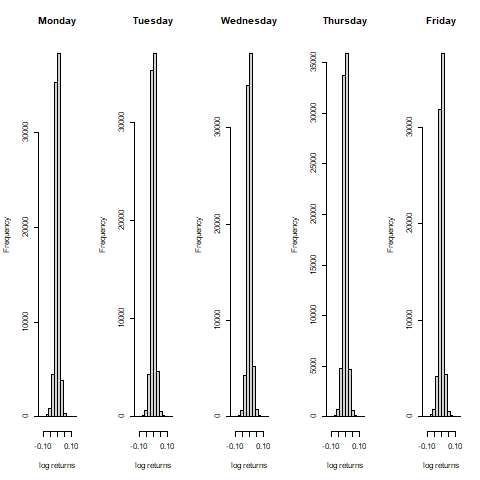

In [4]:
%%R
#histogram of log-return on each day
par(mfrow=c(1,5))
hist(Monday$logreturn,xlim = c(-0.12,0.12),breaks = 40, main = "Monday", xlab = 'log returns')
hist(Tuesday$logreturn,xlim = c(-0.12,0.12),breaks = 40, main = "Tuesday", xlab = 'log returns')
hist(Wednesday$logreturn,xlim = c(-0.12,0.12),breaks = 40, main = "Wednesday", xlab = 'log returns')
hist(Thursday$logreturn,xlim = c(-0.12,0.12),breaks = 40, main = "Thursday", xlab = 'log returns')
hist(Friday$logreturn,xlim = c(-0.12,0.12),breaks = 40, main = "Friday", xlab = 'log returns')

The histograms illustrate the frequency distribution of the log returns for each days of the week. Does this sound familiar? Yes, this is related to the first definition of Monday returns. By looking at the distribution, the log returns are close to zero for all days of the week. In fact, the number of days in which the log returns are slighly above zero is higher than thos slighly less than zero for all days of the week. Therefore, Monday effect in term of its first definition seems less promising. However, this section is related to the second definition of Monday effect. So, let's dive into examining the relationship between two consecutive days of the week. We will examine the linear regression on the pairs of consecutive days of the week.  

### Examining the relationship between the pairs of consecutive days of the week

In [7]:
%%R
# Let's look at the relationship between the log returns for pairs of consecutive days. A linear model is fit to the data.
fit_F_M = lm(Friday$logreturn~Next_Monday$logreturn)
fit_M_Tu = lm(Monday$logreturn~Tuesday$logreturn)
fit_Tu_W = lm(Tuesday$logreturn~Wednesday$logreturn)
fit_W_Th = lm(Wednesday$logreturn~Thursday$logreturn)
fit_Th_F = lm(Thursday$logreturn~Friday$logreturn)
tab_model(fit_F_M, fit_M_Tu, fit_Tu_W, fit_W_Th,fit_Th_F)

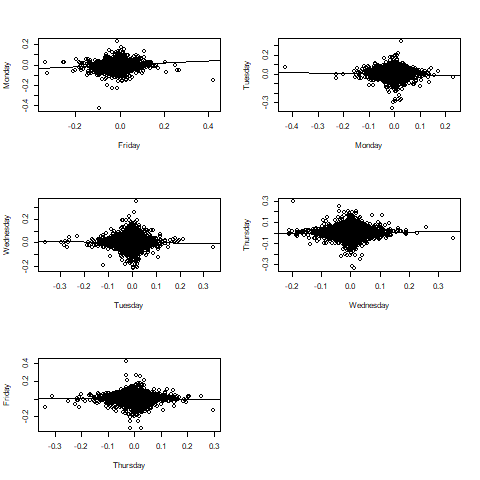

In [62]:
%%R
# Let's visualize our data. We will draw a scatter plot and the linear regression. 
layout(matrix(c(1,2,3,4,5,6), nrow = 3, ncol = 2, byrow = TRUE))
plot(Friday$logreturn,Next_Monday$logreturn,
    xlab = "Friday", ylab = "Monday")
abline(fit_F_M)
plot(Monday$logreturn,Tuesday$logreturn,
    xlab = "Monday", ylab = "Tuesday")
abline(fit_M_Tu)
plot(Tuesday$logreturn,Wednesday$logreturn,
    xlab = "Tuesday", ylab = "Wednesday")
abline(fit_Tu_W)
plot(Wednesday$logreturn,Thursday$logreturn,
    xlab = "Wednesday", ylab = "Thursday")
abline(fit_W_Th)
plot(Thursday$logreturn,Friday$logreturn,
    xlab = "Thursday", ylab = "Friday")
abline(fit_Th_F)
mtext("Linear relationship between two consecutive days", outer = TRUE, cex = 1.5)

There is a statistically significant relationship between all pairs of consecutive log returns. With this large of a sample size, a small relationship between the two values will be significant. Therefore, it is not encouraged to take the significance at the face value. We need to also consider the magnitude of the significance. The $R^2$ value indicates that around 0.8% of the variance in Monday returns are explained with the Friday returns. The $R^2$ for these two consecutive days are larger than all other pairs. 

In [65]:
%%R
# We will record the R-squared value and beta coefficents of this linear regression. This will be used later on to compare it to other days of the week.
fit_F_M_R2 = summary(fit_F_M)$r.squared
fit_M_Tu_R2 = summary(fit_M_Tu)$r.squared
fit_Tu_W_R2 = summary(fit_Tu_W)$r.squared
fit_W_Th_R2 = summary(fit_W_Th)$r.squared
fit_Th_F_R2 = summary(fit_Th_F)$r.squared
fit_F_M_Beta = fit_F_M$coef[2]
fit_M_Tu_Beta = fit_M_Tu$coef[2]
fit_Tu_W_Beta = fit_Tu_W$coef[2]
fit_W_Th_Beta = fit_W_Th$coef[2]
fit_Th_F_Beta = fit_Th_F$coef[2]
# Let's create a series that has R-squared values of linear models using all industries on each pair of days
r_before = c(fit_F_M_R2,fit_M_Tu_R2,fit_Tu_W_R2,fit_W_Th_R2,fit_Th_F_R2)
beta_before = c(fit_F_M_Beta, fit_M_Tu_Beta,fit_Tu_W_Beta, fit_W_Th_Beta, fit_Th_F_Beta)

### Examining the relationship between the pairs of consecutive days of the week for different industries

We just looked at the linear relationship between the pairs of consecutive days of the week across all S&P 500 constituents. However, it is possible for Monday effect to vary based on industries. In this sections, we will take a step further in examining Monday effect (don't forget that we are focusing on the second definition here) by analyzing how many industries show a significant relationship between consecutive days of the week.  

In [35]:
%%R
# To make things easier, we will create a function that will run linear models for each groups. In our case, the groups are the industries.
lm_by_group <- function(z) {
   model.fit <- data.frame(coef(summary(lm(y~x,data=z))))
   # The first row is the intercept and the second row is the slope
   model.fit$predictor <- rownames(model.fit)
   model.fit
}

# Let's create a linear model between Friday and the following Monday for each industry
lm_by_industry_M_F <- data.frame(group=Next_Monday$Industry,y=Next_Monday$logreturn,x=Friday$logreturn)
lm_by_industry_M_F = lm_by_industry_M_F %>% drop_na()
models_M_F <- ddply(lm_by_industry_M_F,"group",lm_by_group)


# Let's filter out the industries that do not have significant linear relationship
models_M_F_sig = filter(models_M_F, Pr...t.. <0.05)
industry_M_F_sig = unique(models_M_F_sig$group)

# Let's calculate the proportion of industries that showed a significant linear relatioship between Monday and Friday's log returns
M_F = sum(models_M_F$Pr...t..<0.05)/nrow(models_M_F)

# We will repeat what we did above for rest of the pairs of consecutive days
lm_by_industry_F_Th <- data.frame(group=Friday$Industry,y=Friday$logreturn,x=Thursday$logreturn)
lm_by_industry_F_Th = lm_by_industry_F_Th %>% drop_na()
models_F_Th <- ddply(lm_by_industry_F_Th,"group",lm_by_group)
F_Th = sum(models_F_Th$Pr...t..<0.05)/nrow(models_F_Th)
models_F_Th_sig = filter(models_F_Th, Pr...t.. <0.05)
industry_F_Th_sig = unique(models_F_Th_sig$group)


lm_by_industry_Th_W <- data.frame(group=Thursday$Industry,y=Thursday$logreturn,x=Wednesday$logreturn)
lm_by_industry_Th_W = lm_by_industry_Th_W %>% drop_na()
models_Th_W <- ddply(lm_by_industry_Th_W,"group",lm_by_group)
Th_W = sum(models_Th_W$Pr...t..<0.05)/nrow(models_Th_W)
models_Th_W_sig = filter(models_Th_W, Pr...t.. <0.05)
industry_Th_W_sig = unique(models_Th_W_sig$group)


lm_by_industry_W_Tu <- data.frame(group=Wednesday$Industry,y=Wednesday$logreturn,x=Tuesday$logreturn)
lm_by_industry_W_Tu = lm_by_industry_W_Tu %>% drop_na()
models_W_Tu <- ddply(lm_by_industry_W_Tu,"group",lm_by_group)
W_Tu = sum(models_W_Tu$Pr...t..<0.05)/nrow(models_W_Tu)
models_W_Tu_sig = filter(models_W_Tu, Pr...t.. <0.05)
industry_W_Tu_sig = unique(models_W_Tu_sig$group)


lm_by_industry_Tu_M <- data.frame(group=Tuesday$Industry,y=Tuesday$logreturn,x=Monday$logreturn)
lm_by_industry_Tu_M = lm_by_industry_Tu_M %>% drop_na()
models_Tu_M <- ddply(lm_by_industry_Tu_M,"group",lm_by_group)
Tu_M = sum(models_Tu_M$Pr...t..<0.05)/nrow(models_Tu_M)
models_Tu_M_sig = filter(models_Tu_M, Pr...t.. <0.05)
industry_Tu_M_sig = unique(models_Tu_M_sig$group)

#Let's compare the proportion of industries that showed signicant linear relationship between the consecutive day pairs
sig_est_perc = data.frame(M_F,F_Th,Th_W,W_Tu,Tu_M)
colnames(sig_est_perc) <- c("Monday & Friday","Friday & Thursday", "Thursday & Wednesday", "Wednesday & Tuesday", "Tuesday & Monday")
print(round(sig_est_perc,3), row.names = "Proportion of industries with significant relationships")

                                                        Monday & Friday
Proportion of industries with significant relationships           0.375
                                                        Friday & Thursday
Proportion of industries with significant relationships             0.203
                                                        Thursday & Wednesday
Proportion of industries with significant relationships                0.181
                                                        Wednesday & Tuesday
Proportion of industries with significant relationships               0.319
                                                        Tuesday & Monday
Proportion of industries with significant relationships            0.267


Compared to other pairs of consecutive days, Monday and Friday pair had the largest proportion (37.5%) of industries that had signiciant linear relationship between the log returns. This is twice as large as the proportion of industries for Thursday and Wednesday pair (18.1%). We just looked at the proprotion of the signiciant industries. To closely scrutinize Monday effect, we will investigate the $R^2$ and $\beta$ coefficients. This will provide how much of the variance of the log returns for a given day is explained with that of the previous day and also the strength as well as the direction of the effect.

In [60]:
%%R
# Let's select the subset of the data which includes the industries that had signicant relatinoship bewteen the Monday and Friday log returns 
Monday_Friday_M = subset(Next_Monday,Industry %in% industry_M_F_sig)
Monday_Friday_F = subset(Friday,Index %in% Monday_Friday_M$Index)

# Let's run the linear model again
fit_F_M_sig = lm(Monday_Friday_F$logreturn~Monday_Friday_M$logreturn)

# We will repeat these two steps for the rest of the pairs
Monday_Tuesday_M = subset(Monday,Industry %in% industry_Tu_M_sig)
Monday_Tuesday_Tu = subset(Tuesday,Index %in% Monday_Tuesday_M$Index)
fit_M_Tu_sig = lm(Monday_Tuesday_M$logreturn~Monday_Tuesday_Tu$logreturn)


Tuesday_Wednesday_Tu = subset(Tuesday,Industry %in% industry_W_Tu_sig)
Tuesday_Wednesday_W = subset(Wednesday,Index %in% Tuesday_Wednesday_Tu$Index)
fit_Tu_W_sig = lm(Tuesday_Wednesday_Tu$logreturn~Tuesday_Wednesday_W$logreturn)

Wednesday_Thursday_W = subset(Wednesday,Industry %in% industry_Th_W_sig)
Wednesday_Thursday_Th = subset(Thursday,Index %in% Wednesday_Thursday_W$Index)
fit_W_Th_sig = lm(Wednesday_Thursday_W$logreturn~Wednesday_Thursday_Th$logreturn)

Thursday_Friday_Th = subset(Thursday,Industry %in% industry_F_Th_sig)
Thursday_Friday_F = subset(Friday,Index %in% Thursday_Friday_Th$Index)
fit_Th_F_sig = lm(Thursday_Friday_Th$logreturn~Thursday_Friday_F$logreturn)

# Let's look at the relationship between the log returns for pairs of consecutive days for these industries
tab_model(fit_F_M_sig, fit_M_Tu_sig, fit_Tu_W_sig, fit_W_Th_sig,fit_Th_F_sig)


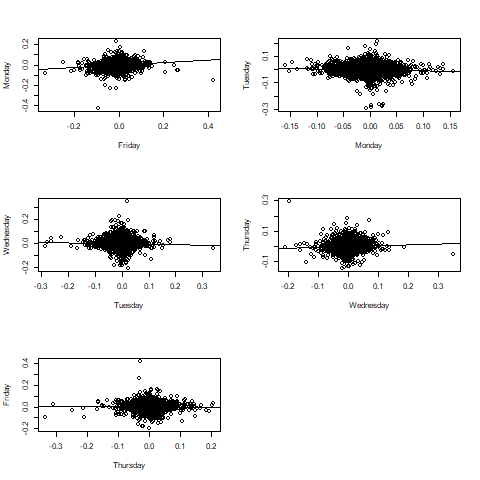

In [64]:
%%R
# Let's visualize our data. We will draw a scatter plot and the linear regression. 
layout(matrix(c(1,2,3,4,5,6), nrow = 3, ncol = 2, byrow = TRUE))
plot(Monday_Friday_F$logreturn,Monday_Friday_M$logreturn,
    xlab = "Friday", ylab = "Monday")
abline(fit_F_M_sig)
plot(Monday_Tuesday_M$logreturn,Monday_Tuesday_Tu$logreturn,
    xlab = "Monday", ylab = "Tuesday")
abline(fit_M_Tu_sig)
plot(Tuesday_Wednesday_Tu$logreturn,Tuesday_Wednesday_W$logreturn,
    xlab = "Tuesday", ylab = "Wednesday")
abline(fit_Tu_W_sig)
plot(Wednesday_Thursday_W$logreturn,Wednesday_Thursday_Th$logreturn,
    xlab = "Wednesday", ylab = "Thursday")
abline(fit_W_Th_sig)
plot(Thursday_Friday_Th$logreturn,Thursday_Friday_F$logreturn,
    xlab = "Thursday", ylab = "Friday")
abline(fit_Th_F_sig)

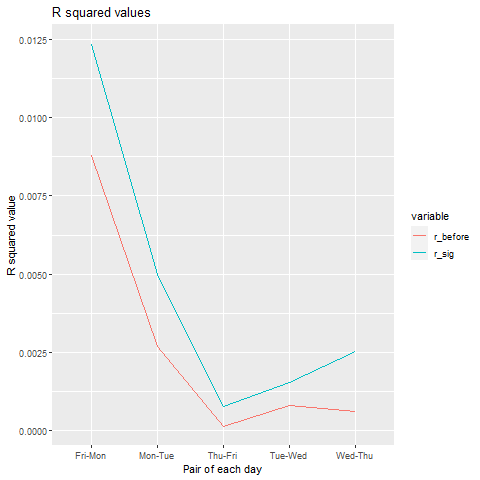

In [69]:
%%R
#We will also visualize the R-squared values and the beta coefficients for the pairs for the model that only includes the significant industries

#First, we need to save the R-squared values and the beta coefficents.
fit_F_M_sig_R2 = summary(fit_F_M_sig)$r.squared
fit_M_Tu_sig_R2 = summary(fit_M_Tu_sig)$r.squared
fit_Tu_W_sig_R2 = summary(fit_Tu_W_sig)$r.squared
fit_W_Th_sig_R2 = summary(fit_W_Th_sig)$r.squared
fit_Th_F_sig_R2 = summary(fit_Th_F_sig)$r.squared
fit_F_M_sig_Beta = fit_F_M_sig$coef[2]
fit_M_Tu_sig_Beta = fit_M_Tu_sig$coef[2]
fit_Tu_W_sig_Beta = fit_Tu_W_sig$coef[2]
fit_W_Th_sig_Beta = fit_W_Th_sig$coef[2]
fit_Th_F_sig_Beta = fit_Th_F_sig$coef[2]

# Let's store these values
r_sig = c(fit_F_M_sig_R2,fit_M_Tu_sig_R2,fit_Tu_W_sig_R2,fit_W_Th_sig_R2,fit_Th_F_sig_R2)
beta_sig = c(fit_F_M_sig_Beta,fit_M_Tu_sig_Beta,fit_Tu_W_sig_Beta,fit_W_Th_sig_Beta,fit_Th_F_sig_Beta)

# We will calculate how much the R-squared values and beta coefficients changed when using all the industries and only the significant industries
r_improve = (r_sig-r_before)/r_before
beta_improve = (beta_sig-beta_before)/beta_before

# Let's plot both R-squared values
names = c("Fri-Mon","Mon-Tue","Tue-Wed","Wed-Thu","Thu-Fri")
r_table =data.frame(names,r_before,r_sig)
r_melt <- melt(r_table, id = "names")
ggplot(data = r_melt) +
  geom_line(aes(x = names, y = value, colour = variable, group = variable))+ labs(x = "Pair of each day",y = "R squared value",title = "R squared values")

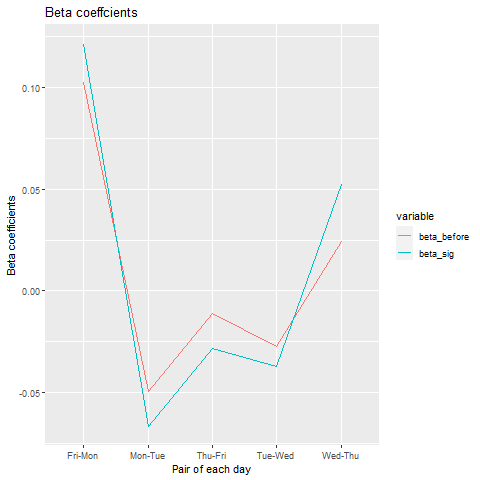

In [70]:
%%R
# Let's plot both beta-coefficeitns
names = c("Fri-Mon","Mon-Tue","Tue-Wed","Wed-Thu","Thu-Fri")
beta_table =data.frame(names,beta_before,beta_sig)
beta_melt <- melt(beta_table, id = "names")
ggplot(data = beta_melt) +
  geom_line(aes(x = names, y = value, colour = variable, group = variable))+ labs(x = "Pair of each day",y = "Beta coefficients",title = "Beta coeffcients")

From the plot above, all the R squared values are small, indicating that only very little of stock price change can be explained by the previous day's stock price change. However, the Friday-Monday linear relationship has a relatively higher R squared value than other pairs, suggesting that Monday's stock price change tends to be more sensitive to Friday's stock price than any other pairs of consecutive two days.

The red line shows the R squared values of linear models done on all industries while the blue line shows the R squared values of linear models done on the industries that has the most significant linear relationships. The list of industries that have the most significant linear relationships is achieved by running linear models by industry and selecting those industries whose p-values are less than 0.05. The two lines has the same pattern: Friday-Monday has the most strongest relationship than any other pairs and the model performance enhanced with selected industries.

This observation from the 2014 to 2017 in the US market to some extent validates the second definition of Monday effect. (Need to rerun the codes on the latest dataset.)